# [Part tow of my project (link)](https://www.kaggle.com/code/abdalrahmanshahrour/diamonds-data-pt2-algorithms-selection)

# About Dataset
## Context
> This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
* **price** price in US dollars (\$326--\$18,823)

* **carat** weight of the diamond (0.2--5.01)

* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color** diamond colour, from J (worst) to D (best)

* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **x** length in mm (0--10.74)

* **y** width in mm (0--58.9)

* **z** depth in mm (0--31.8)

* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* **table** width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# read data

In [2]:
data = pd.read_csv('../input/diamonds/diamonds.csv')
data.sample(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
40232,40233,0.41,Ideal,G,VVS1,61.5,57.0,1123,4.79,4.82,2.95
11416,11417,1.16,Ideal,E,SI2,62.7,56.0,5001,6.69,6.73,4.21
34104,34105,0.38,Very Good,G,VVS2,61.5,57.0,853,4.66,4.68,2.87
45676,45677,0.52,Ideal,E,VS2,61.7,57.0,1694,5.17,5.10,3.17


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
x = data.select_dtypes('object').columns
for i in x:
    print(i,': ',data[i].unique())

cut :  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color :  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity :  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [6]:
del data['Unnamed: 0']

# visualization

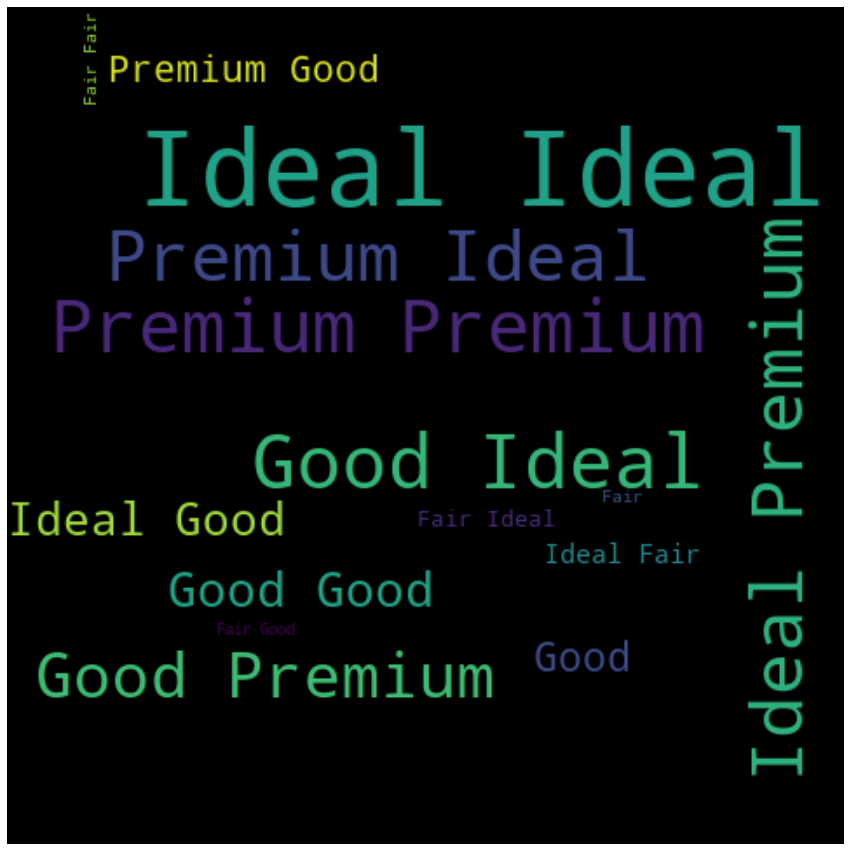

In [7]:
from wordcloud import WordCloud
plt.figure(figsize =(15,30))
text = ' '.join(list(data['cut']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

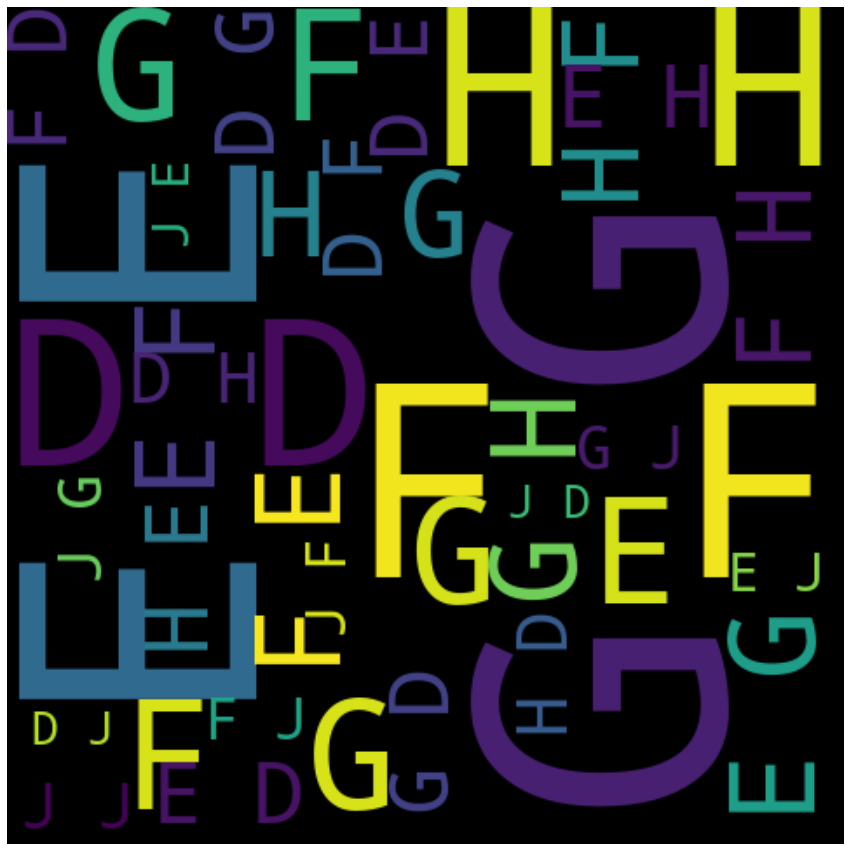

In [8]:
plt.figure(figsize =(15,30))
text = ' '.join(list(data['color']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

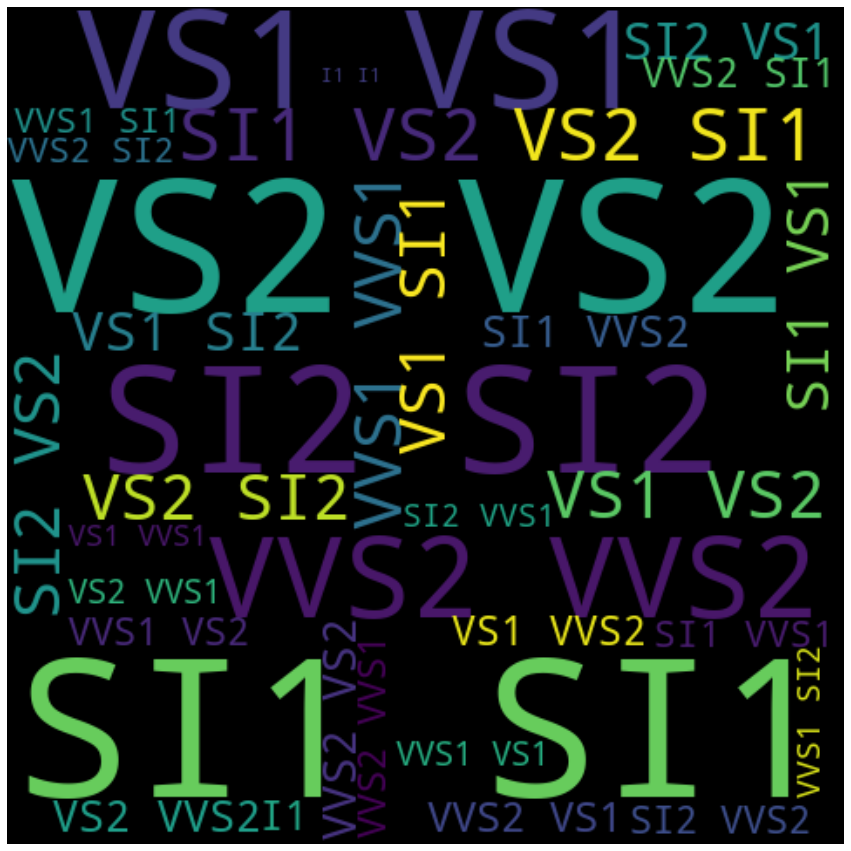

In [9]:
from wordcloud import WordCloud
plt.figure(figsize =(15,30))
text = ' '.join(list(data['clarity']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [10]:
corr = data.corr()
fig = px.imshow(corr, text_auto=True)
fig.show()

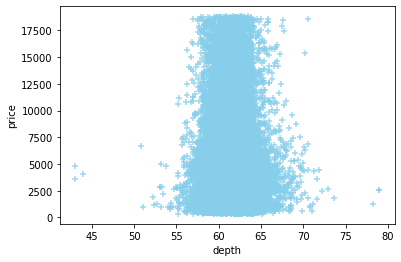

In [11]:
df = data[['depth','price','cut']]
 
sns.regplot(data=df, x="depth", y="price", fit_reg=False, marker="+", color="skyblue")

plt.show()

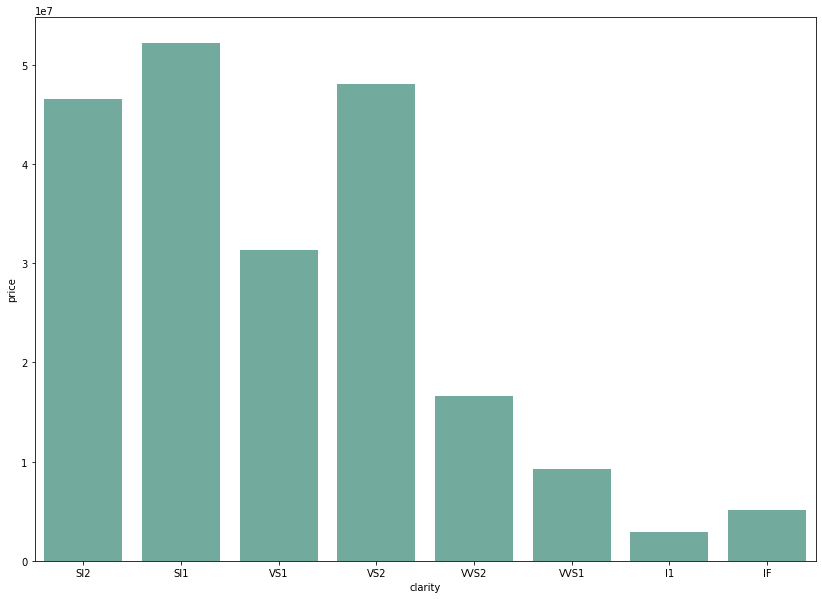

In [12]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="price", 
    x="clarity", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

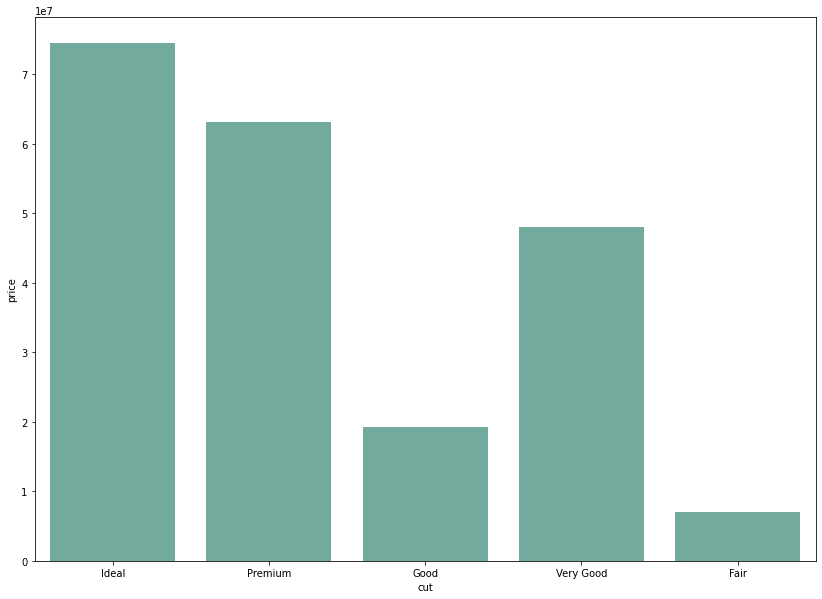

In [13]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="price", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

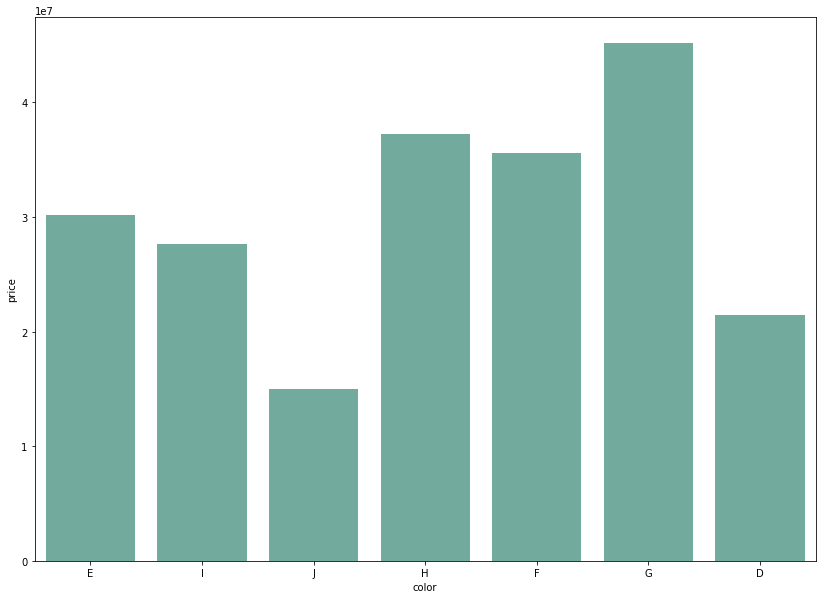

In [14]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="price", 
    x="color", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

<AxesSubplot:xlabel='cut', ylabel='price'>

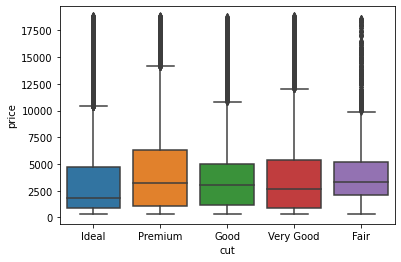

In [15]:
sns.boxplot( x=data["cut"], y=data["price"] )

<AxesSubplot:xlabel='color', ylabel='price'>

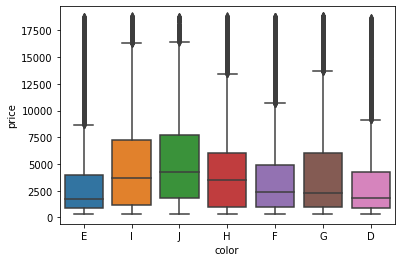

In [16]:
sns.boxplot( x=data["color"], y=data["price"] )

<AxesSubplot:xlabel='clarity', ylabel='price'>

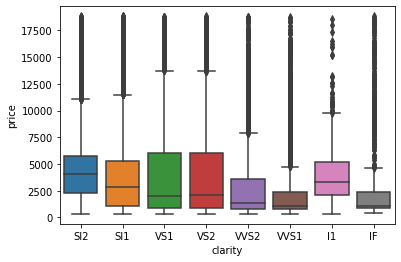

In [17]:
sns.boxplot( x=data["clarity"], y=data["price"] )

# Missing Data

In [18]:
data_num = data.select_dtypes(['float64','int64'])
data_obj =  data.select_dtypes('object')

## numerical data fill na

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
d=imputer.fit_transform(data_num)
data_num=pd.DataFrame(d,columns=data.select_dtypes(['float64','int64']).columns)

## Categorical data fill na

In [20]:
imp = SimpleImputer(strategy="most_frequent")
d2 = imp.fit_transform(data_obj)
data_obj = pd.DataFrame(d2,columns=data_obj.columns)
data_obj

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


# Categorical data

In [21]:
data_obj_ord = data_obj[['cut','clarity']]
data_obj_no = data_obj[['color']]

- ## Ordinal Data

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit_transform(data_obj_ord)
data_obj_ord = pd.DataFrame(diamond_cat_encoded,columns=['cut','clarity'])

- ## Nominal Data

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

data_obj_no = cat_encoder.fit_transform(data_obj_no)
data_obj_no
data_obj_no = pd.DataFrame(data_obj_no.toarray(),dtype=np.float64,columns=['E', 'I', 'J', 'H', 'F' ,'G', 'D'])

In [24]:
data_processing = pd.concat([data_num,data_obj_ord,data_obj_no],axis=1)
data_processing.sample()

,carat,depth,table,price,x,y,z,cut,clarity,E,I,J,H,F,G,D
6739,0.36,62.3,54.0,579.0,4.59,4.62,2.87,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Outilers

In [25]:
from scipy import stats
import numpy as np
for i in [2,3,4,5,6]:
    print(f'===========================<<<<<<< {i} >>>>>>>>==============================')
    x = data_processing[(np.abs(stats.zscore(data_processing))<i).all(axis=1)]
    print('remove col : ',data_processing.shape[0]-x.shape[0])

===========================<<<<<<< 2 >>>>>>>>==============================
remove col :  44870
===========================<<<<<<< 3 >>>>>>>>==============================
remove col :  4949
===========================<<<<<<< 4 >>>>>>>>==============================
remove col :  3122
===========================<<<<<<< 5 >>>>>>>>==============================
remove col :  126
===========================<<<<<<< 6 >>>>>>>>==============================
remove col :  47


In [26]:
x = data_processing.copy()
data_processing1 = x[(np.abs(stats.zscore(data_processing))<3).all(axis=1)]

# Feature extraction

In [27]:
data_processing1['size'] = data_processing1['x']*data_processing1['y']*data_processing1['z'] 
data_processing1_copy = data_processing1.copy()
data_processing1.drop(['x','y','z'],inplace=True,axis=1)
data_processing1.sample(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,carat,depth,table,price,cut,clarity,E,I,J,H,F,G,D,size
25296,1.71,61.3,58.0,13951.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,284.91925
30442,0.32,61.5,59.0,730.0,3.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,52.03359


# Feature Scalling

In [28]:
from sklearn.preprocessing import StandardScaler

num_scaler=StandardScaler()
data_processing1_Scaler = pd.DataFrame(num_scaler.fit_transform(data_processing1[['carat','cut','clarity','depth','table','price','size']]),columns=['carat','cut','clarity','depth','table','price','size'],index=data_processing1.index)
color = data_processing1[[ 'E','I','J','H','F','G','D']]
data_processing1_after_scaler = pd.concat([data_processing1_Scaler,color],axis=1)

In [29]:
data_processing1_after_scaler.describe()

,carat,cut,clarity,depth,table,price,size,E,I,J,H,F,G,D
count,4.899100e+04,4.899100e+04,4.899100e+04,4.899100e+04,4.899100e+04,48991.000000,4.899100e+04,48991.000000,48991.000000,48991.000000,48991.000000,48991.000000,48991.000000,48991.0
mean,-1.113872e-16,-2.506211e-16,-1.728821e-16,2.912310e-16,-2.581629e-15,0.000000,-2.599034e-16,0.134719,0.194158,0.187341,0.221796,0.159866,0.102121,0.0
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,0.341426,0.395555,0.390189,0.415459,0.366486,0.302810,0.0
min,-1.316266e+00,-2.771429e+00,-1.874993e+00,-3.352866e+00,-3.033916e+00,-0.938754,-1.340793e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-8.796227e-01,-8.999601e-01,-6.658208e-01,-5.099492e-01,-6.450545e-01,-0.765882,-8.692346e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-1.033674e-01,3.577455e-02,-6.123483e-02,4.284019e-02,-1.672822e-01,-0.377286,-1.521474e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,6.486300e-01,9.715092e-01,5.433511e-01,5.956296e-01,7.882624e-01,0.420745,6.699442e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,3.559588e+00,9.715092e-01,2.357109e+00,3.359577e+00,3.177124e+00,3.631357,3.780373e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [30]:
data_processing1_after_scaler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48991 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48991 non-null  float64
 1   cut      48991 non-null  float64
 2   clarity  48991 non-null  float64
 3   depth    48991 non-null  float64
 4   table    48991 non-null  float64
 5   price    48991 non-null  float64
 6   size     48991 non-null  float64
 7   E        48991 non-null  float64
 8   I        48991 non-null  float64
 9   J        48991 non-null  float64
 10  H        48991 non-null  float64
 11  F        48991 non-null  float64
 12  G        48991 non-null  float64
 13  D        48991 non-null  float64
dtypes: float64(14)
memory usage: 5.6 MB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

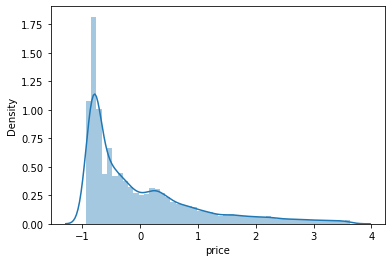

In [31]:
sns.distplot(data_processing1_after_scaler['price'])

In [32]:
corr = data_processing1_after_scaler.corr()
corr['price'].sort_values()

clarity   -0.131936
I         -0.089889
E         -0.063292
cut       -0.059003
J         -0.007187
depth     -0.000869
H          0.026017
F          0.062076
G          0.087219
table      0.127697
carat      0.923939
size       0.925399
price      1.000000
D               NaN
Name: price, dtype: float64

In [33]:
fig = px.imshow(corr, text_auto=True)
fig.show()

# save csv

In [34]:
data_processing1_after_scaler.to_csv(r'my_data.csv', index=False)

# Welcome to my notebook
## This is the first part of a machine learning project for beginners, which is data preprocessing 

> I used a imputer although I didn't need it, but I applied it to the data so that the beginners know that there is a imputer in the sklearn library that can fill in the missing data 

# The End
> If you any questions or advice me please write in the comment

# Upvote